# Radiative excitation / de-excitation

- data:
  - photoexcitation: INASAN
  - photo-de-excitation: INASAN

In [1]:
import numpy as np

import lss

In [2]:
spectrum = lss.BlackBodyPlanck()
spectrum.temperature = 5778.0
spectrum.total_area = 1367.0

# spectrum = lss.SunGueymard()

# spectrum = lss.Kelt9Fossati()

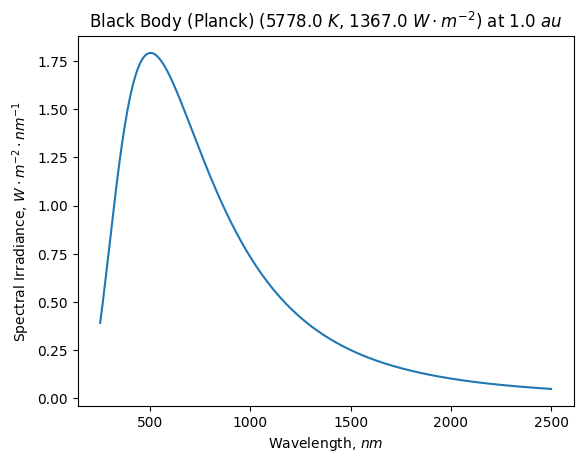

In [3]:
lss.plot_spectrum(
    spectrum,
    wavelengths=np.linspace(250, 2500, int(1e3)),
)

In [4]:
elements = [
    lss.O1Mashonkina(),
]
elements[0].keys = elements[0].all_keys
# elements[0].keys = ["12P3P4", "12P1D4", "13S3S"]
# elements[0].keys = ["12P3P4", "13S3S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
population_nlte_1[0] = 1.0

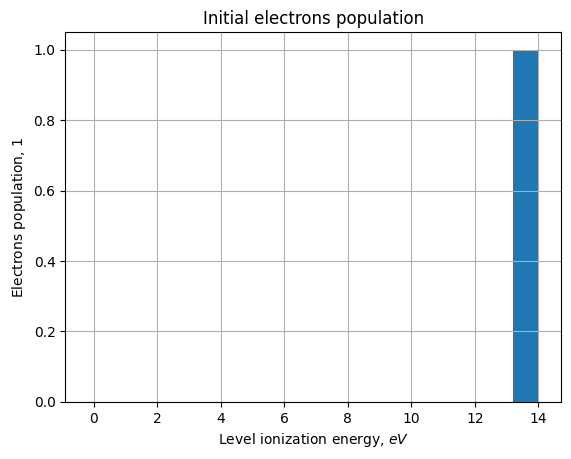

In [5]:
lss.plot_population(
    elements,
    population=population_nlte_1,
    title="Initial electrons population"
)

/home/deverte/Projects/progs/astro/lss_py/lss/calculate_b_factors.py:39: RuntimeWarning: divide by zero encountered in divide
  b_factors[i] = populations_nlte[i] / populations_lte[i]


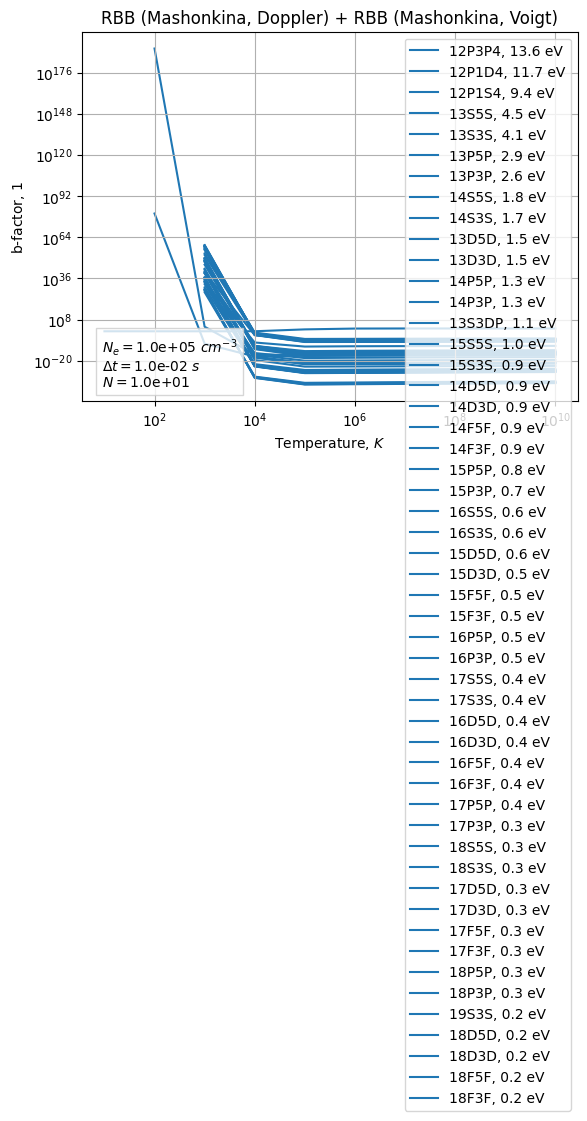

In [6]:
lss.plot_b_factor_temperature(
    elements,
    population_nlte_1 = population_nlte_1,
    spectrum = spectrum,
    charge_transfer_elements = [],
    temperatures = np.geomspace(1.0e1, 1.0e10, num=int(1e1)),
    electron_number_density = 1.0e5,
    optical_depth = None,
    delta_time = 0.01,
    transitions_types = [
        lss.Transition.RBB_MASHONKINA_DOPPLER_O1,
        lss.Transition.RBB_MASHONKINA_VOIGT_O1,
    ],
    legend_1_loc = 'upper right',
    legend_2_loc = 'lower left',
)